<center><h1>Inteligencia Artificial</header1></center>

Presentado por: <br>
- Anthony Mauricio Goyes Díaz  <br>

Fecha: 08/08/2022

# Importación de librerias necesarias

In [1]:
'''Se importa la libreria cv2'''
import cv2
'''Se importa la libreria numpy'''
import numpy as np
'''Se importa la libreria os'''
import os
'''Se establece el nivel de codificación'''
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
'''Se importa la libreria shutil'''
import shutil
'''Se importa la libreria glob'''
import glob
'''Se importa la libreria pandas'''
import pandas as pd
'''Se importa la libreria pyplot'''
import matplotlib.pyplot as plt
'''Se importa el módulo seaborn'''
import seaborn as sn
'''Se importan el módulo ImageDataGenerator'''
from keras.preprocessing.image import ImageDataGenerator
'''Se importan los módulos array_to_img, img_to_array, load_img'''
from tensorflow.keras.utils import img_to_array, array_to_img, img_to_array, load_img
'''Se importa el módulo Image'''
from  PIL  import Image
'''Se importa el módulo MinMaxScaler'''
from sklearn.preprocessing import MinMaxScaler
'''Se importa la libreria h5py'''
import h5py
'''Se importa el módulo sleep'''
from time import sleep
'''Se importa la librería patoolib'''
import patoolib
'''Se importa el módulo remove'''
from rembg import remove
'''Se importa el método io del módulo skimage'''
from skimage import io
'''Se importa el módulo random'''
import random

In [23]:
'''Se establece la ruta general de espacio de trabajo'''
os.chdir('C:/Users/Personal/IA/Laboratorio1U3')

In [24]:
'''Se establece la ruta de las imágenes'''
ruta_imagenes = "./Estudiantes_datos_origen"
'''Se muestra los directorios (clases) del dataset'''
nombre_clases = os.listdir(ruta_imagenes)
'''Se ordenan en orden alfabético (AZ - az)'''
nombre_clases.sort()
'''Se muestran las clases del dataset'''
print(nombre_clases)

['GoyesAnthony', 'HerediaGenesis', 'SolorzanoBryan', 'WilmerSolano', 'ZambranoJhon']


In [25]:
def cargarImagenes(ruta_imagenes):
    imagen = []
    '''Se genera un bucle para recorrer cada etiqueta de las clases'''
    for nombre_clase in nombre_clases:
        '''Se almacena la ruta actual de cada clase por ciclo'''
        ruta_actual = ruta_imagenes + "/" + nombre_clase
        '''Se obtiene una lista de los elementos por clase'''
        elementos = os.listdir(ruta_actual) 
        '''Se genera un nuevo ciclo que recorre cada elemento por clase'''
        ran = random.randint(0, len(elementos) - 1)
        imagen.append(io.imread(ruta_imagenes + "/" + nombre_clase +'/'+ elementos[ran])/255.0) 
        
    plt.figure(figsize=(10,7))
    for iterador in range(len(nombre_clases)):
        ax = plt.subplot(2,3, iterador+1)
        plt.imshow(imagen[iterador])
        plt.title(nombre_clases[iterador] + ' ' + str(imagen[iterador].shape), color= 'white')
        plt.axis('off')

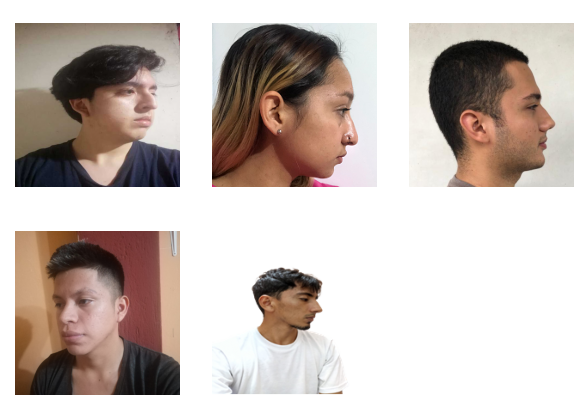

In [26]:
cargarImagenes(ruta_imagenes)

In [27]:
def crearDirecotrio(ruta):
    '''Pasos para almacenar los nuevos datos después de usar la técnica de
    aumentos de datos'''
    '''Se crea un nuevo directorio con la ruta anterior'''
    os.mkdir(ruta)
    '''Se establece un ciclo que creará el nombre y directorio de las carpetas
    que contendrá las imágenes de cada una de las clases'''
    for clase in nombre_clases:
        subdirectorio = ruta+"/"+clase
        '''Se crea un nuevo directorio con la ruta anterior'''
        os.mkdir(subdirectorio)

In [28]:
ruta = './Estudiantes_datos_aumentados'
crearDirecotrio(ruta)
ruta = './Estudiantes_datos_ruidoEliminado'
crearDirecotrio(ruta)
ruta = './Estudiantes_datos_fondoEliminado'
crearDirecotrio(ruta)

In [29]:
'''Se genera un bucle para recorrer cada etiqueta de las clases'''
for nombre_clase in nombre_clases:
    '''Se almacena la ruta actual de cada clase por ciclo'''
    ruta_actual = ruta_imagenes + "/" + nombre_clase
    '''Se obtiene una lista de los elementos por clase'''
    elementos = os.listdir(ruta_actual) 
    '''Se genera un nuevo ciclo que recorre cada elemento por clase'''
    for elemento in elementos:
        imagen = ruta_actual+'/'+elemento
        imagen = cv2.imread(imagen)
        imagen = cv2.resize(imagen, (192,192))
        '''Se imprime un mensaje del proceso'''
        print("Copiando imagen - {} en Estudiantes_datos_aumentados/{}".format(elemento, nombre_clase))
        '''Se establece la ruta destino de ese elemento'''
        ruta_destino = ("C:/Users/Personal/IA/Laboratorio1U3/Estudiantes_datos_Aumentados/" + nombre_clase + '/') 
        '''Se copia el elemento del origen al destino'''
        cv2.imwrite(os.path.join(ruta_destino, elemento)    , imagen)

Copiando imagen - L00393010_1.jpg en Estudiantes_datos_aumentados/GoyesAnthony
Copiando imagen - L00393010_2.jpg en Estudiantes_datos_aumentados/GoyesAnthony
Copiando imagen - L00393010_3.jpg en Estudiantes_datos_aumentados/GoyesAnthony
Copiando imagen - L00392991_1.jpg en Estudiantes_datos_aumentados/HerediaGenesis
Copiando imagen - L00392991_2.jpg en Estudiantes_datos_aumentados/HerediaGenesis
Copiando imagen - L00392991_3.jpg en Estudiantes_datos_aumentados/HerediaGenesis
Copiando imagen - L00080131_1.jpg en Estudiantes_datos_aumentados/SolorzanoBryan
Copiando imagen - L00080131_2.jpg en Estudiantes_datos_aumentados/SolorzanoBryan
Copiando imagen - L00080131_3.jpg en Estudiantes_datos_aumentados/SolorzanoBryan
Copiando imagen - L00392980_1.jpg en Estudiantes_datos_aumentados/WilmerSolano
Copiando imagen - L00392980_2.jpg en Estudiantes_datos_aumentados/WilmerSolano
Copiando imagen - L00392980_3.jpg en Estudiantes_datos_aumentados/WilmerSolano
Copiando imagen - L00392993_Centro.jpg e

# Aumento de datos (Data augmentation)

In [32]:
'''Se crea un elemento para generar imagenes según sus hiperparámetros'''
generacionDatos = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.4,
        horizontal_flip=True,
        fill_mode='nearest')

## Clase de "Goyes Anthony" (GoyesAnthony) 

In [33]:
'''Se redirecciona con una ruta dinámica para el sistema'''
os.chdir(r'C:/Users/Personal/IA/Laboratorio1U3/Estudiantes_datos_aumentados/GoyesAnthony')
'''Se genera una ciclo que recorre cada elemento de la clase "GoyesAnthony"'''
for elemento in os.listdir():
    '''Se almacena la imagen de la ruta'''
    imagen = load_img(f"{elemento}")
    '''Se almacena un array Numpy con forma (3, 150, 150)'''
    x = img_to_array(imagen)    # this is a Numpy array with shape (3, 150, 150)
    '''Se aumenta una dimensión por ciclo que hará referencia a cada elemento'''
    
    x = x.reshape((1,) + x.shape)
    '''Se inicializa un iterador'''
    iterador = 0
    '''Se genera un ciclo que corrererá cada lote de la transformación con sus
    hiperparámetros'''
    for lote in generacionDatos.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'totally_green', 
            save_format='jpg'):
        '''Se aumenta en una unidad en el iterador'''
        iterador += 1
        '''Se crea 5 imágenes de cada imagen'''
        if iterador == 10: 
            break  

## Clase de "Heredia Genesis" (HerediaGenesis) 

In [34]:
'''Se redirecciona con una ruta dinámica para el sistema'''
os.chdir(r'C:/Users/Personal/IA/Laboratorio1U3/Estudiantes_datos_aumentados/HerediaGenesis')
'''Se genera una ciclo que recorre cada elemento de la clase "HerediaGenesis"'''
for ruta in os.listdir():
    '''Se almacena la imagen de la ruta'''
    imagen = load_img(f"{ruta}")
    '''Se almacena un array Numpy con forma (3, 150, 150)'''
    x = img_to_array(imagen) 
    '''Se aumenta una dimensión por ciclo que hará referencia a cada elemento'''
    x = x.reshape((1,) + x.shape)
    '''Se inicializa un iterador'''
    iterador = 0
    '''Se genera un ciclo que corrererá cada lote de la transformación con sus
    hiperparámetros'''
    for batch in generacionDatos.flow(x, batch_size=1,
            save_to_dir=".",  
            save_prefix= 'yellow_with_green_tips', 
            save_format='jpg'):
        '''Se aumenta en una unidad en el iterador'''
        iterador += 1
        '''Se crea 5 imágenes de cada imagen'''
        if iterador == 10:
            break  

## Clase de "Solórzano Bryan" (SolórzanoBryan)

In [35]:
'''Se redirecciona con una ruta dinámica para el sistema'''
os.chdir(r'C:/Users/Personal/IA/Laboratorio1U3/Estudiantes_datos_aumentados/SolorzanoBryan')
'''Se genera una ciclo que recorre cada elemento de la clase "SolorzanoBryan'''
for ruta in os.listdir():
    '''Se almacena la imagen de la ruta'''
    imagen = load_img(f"{ruta}")
    '''Se almacena un array Numpy con forma (3, 150, 150)'''
    x = img_to_array(imagen) 
    '''Se aumenta una dimensión por ciclo que hará referencia a cada elemento'''
    x = x.reshape((1,) + x.shape)
    '''Se inicializa un iterador'''
    iterador = 0
    '''Se genera un ciclo que corrererá cada lote de la transformación con sus
    hiperparámetros'''
    for batch in generacionDatos.flow(x, batch_size=1,
            save_to_dir=".",   
            save_prefix= 'yellow_with_brown_spots', 
            save_format='jpg'):
        '''Se aumenta en una unidad en el iterador'''
        iterador += 1
        '''Se crea 5 imágenes de cada imagen'''
        if iterador == 10:
            break 

## Clase de "Wilmer Solano" (WilmerSolano)

In [36]:
'''Se redirecciona con una ruta dinámica para el sistema'''
os.chdir(r'C:/Users/Personal/IA/Laboratorio1U3/Estudiantes_datos_aumentados/WilmerSolano')
'''Se genera una ciclo que recorre cada elemento de la clase "WilmerSolano'''
for ruta in os.listdir():
    '''Se almacena la imagen de la ruta'''
    imagen = load_img(f"{ruta}")
    '''Se almacena un array Numpy con forma (3, 150, 150)'''
    x = img_to_array(imagen) 
    '''Se aumenta una dimensión por ciclo que hará referencia a cada elemento'''
    x = x.reshape((1,) + x.shape)
    '''Se inicializa un iterador'''
    iterador = 0
    '''Se genera un ciclo que corrererá cada lote de la transformación con sus
    hiperparámetros'''
    for batch in generacionDatos.flow(x, batch_size=1,
            save_to_dir=".",   
            save_prefix= 'yellow_with_brown_spots', 
            save_format='jpg'):
        '''Se aumenta en una unidad en el iterador'''
        iterador += 1
        '''Se crea 5 imágenes de cada imagen'''
        if iterador == 10:
            break 

## Clase de "Zambrano Jhon" (ZambranoJhon)

In [37]:
'''Se redirecciona con una ruta dinámica para el sistema'''
os.chdir(r'C:/Users/Personal/IA/Laboratorio1U3/Estudiantes_datos_aumentados/ZambranoJhon')
'''Se genera una ciclo que recorre cada elemento de la clase "ZambranoJhon'''
for ruta in os.listdir():
    '''Se almacena la imagen de la ruta'''
    imagen = load_img(f"{ruta}")
    '''Se almacena un array Numpy con forma (3, 150, 150)'''
    x = img_to_array(imagen) 
    '''Se aumenta una dimensión por ciclo que hará referencia a cada elemento'''
    x = x.reshape((1,) + x.shape)
    '''Se inicializa un iterador'''
    iterador = 0
    '''Se genera un ciclo que corrererá cada lote de la transformación con sus
    hiperparámetros'''
    for batch in generacionDatos.flow(x, batch_size=1,
            save_to_dir=".",   
            save_prefix= 'yellow_with_brown_spots', 
            save_format='jpg'):
        '''Se aumenta en una unidad en el iterador'''
        iterador += 1
        '''Se crea 5 imágenes de cada imagen'''
        if iterador == 10:
            break 

## Filtro NLM para la eliminación de ruido de las imágenes

In [38]:
'''Se redirecciona con una ruta dinámica al directorio general
para el sistema'''
os.chdir(r'C:/Users/Personal/IA/Laboratorio1U3')
'''Se establece la ruta que contiene a las clases del dataset'''
ruta_imagenes = "./Estudiantes_datos_Aumentados"
'''Se almacena los directorios de cada clase'''
nombre_clases = os.listdir(ruta_imagenes)
'''Se ordena los elementos por orden alfabético'''
nombre_clases.sort()
'''Se imprimen las clases'''
print(nombre_clases)

['GoyesAnthony', 'HerediaGenesis', 'SolorzanoBryan', 'WilmerSolano', 'ZambranoJhon']


In [40]:
'''Se genera un bucle para recorrer cada etiqueta de las clases'''
for nombre_clase in nombre_clases:     
    '''Se almacena la ruta actual de cada clase por ciclo'''
    ruta_actual = ruta_imagenes + "/" + nombre_clase
    '''Se almacenan las etiquetas de las clases'''
    etiqueta_actual = nombre_clase
    '''Se genera un iterador'''
    iterador = 1
    '''Se recorre cada imagen por clase sin importar su nombre o extensión'''
    for file in glob.glob(ruta_actual + "/*"):
        '''Se imprime el proceso'''
        print("Procesando imagen - {} en {}".format(iterador, etiqueta_actual))
        '''Se leen las rutas de las imágenes'''
        imagen = cv2.imread(file)
        '''Se establece la denotación de imágenes'''
        dst = cv2.fastNlMeansDenoisingColored(imagen,None,10,10,7,21)
        '''Se divide por capa de color'''
        b,g,r = cv2.split(dst)
        '''Se unen las capas seperadas en orden (r,g,b)'''
        rgb_dst = cv2.merge([r,g,b])
        '''Se guardan las imagenes'''
        ruta_guardado = './Estudiantes_datos_ruidoEliminado/'+ etiqueta_actual
        '''Se genera cada imagen según la ruta de guardado'''
        cv2.imwrite(os.path.join(ruta_guardado , etiqueta_actual + '_' + str(iterador) + '.jpg'),
                    cv2.cvtColor(rgb_dst,cv2.COLOR_RGB2BGR))
        
        '''Se muestra la actualización del bucle'''
        iterador += 1

Procesando imagen - 1 en GoyesAnthony
Procesando imagen - 2 en GoyesAnthony
Procesando imagen - 3 en GoyesAnthony
Procesando imagen - 4 en GoyesAnthony
Procesando imagen - 5 en GoyesAnthony
Procesando imagen - 6 en GoyesAnthony
Procesando imagen - 7 en GoyesAnthony
Procesando imagen - 8 en GoyesAnthony
Procesando imagen - 9 en GoyesAnthony
Procesando imagen - 10 en GoyesAnthony
Procesando imagen - 11 en GoyesAnthony
Procesando imagen - 12 en GoyesAnthony
Procesando imagen - 13 en GoyesAnthony
Procesando imagen - 14 en GoyesAnthony
Procesando imagen - 15 en GoyesAnthony
Procesando imagen - 16 en GoyesAnthony
Procesando imagen - 17 en GoyesAnthony
Procesando imagen - 18 en GoyesAnthony
Procesando imagen - 19 en GoyesAnthony
Procesando imagen - 20 en GoyesAnthony
Procesando imagen - 21 en GoyesAnthony
Procesando imagen - 22 en GoyesAnthony
Procesando imagen - 23 en GoyesAnthony
Procesando imagen - 24 en GoyesAnthony
Procesando imagen - 25 en GoyesAnthony
Procesando imagen - 26 en GoyesAnt

## Eliminando el fondo

In [99]:
ruta_imagenes = "./Estudiantes_datos_ruidoEliminado"
nombre_clases = os.listdir(ruta_imagenes)
nombre_clases.sort()
print(nombre_clases)

['GoyesAnthony', 'HerediaGenesis', 'SolorzanoBryan', 'WilmerSolano', 'ZambranoJhon']


In [44]:
'''Se genera un bucle para recorrer cada etiqueta de las clases'''
for nombre_clase in nombre_clases:
    '''Se almacena la ruta actual de cada clase por ciclo'''
    ruta_actual = ruta_imagenes + "/" + nombre_clase
    '''Se almacenan las etiquetas de las clases'''
    etiqueta_actual = nombre_clase
    '''Se genera un iterador'''
    iterador = 1
    '''Se recorre cada imagen por clase sin importar su nombre o extensión'''
    for file in glob.glob(ruta_actual + "/*"):
        '''Se imprime el proceso'''
        print("Procesando imaegen - {} en {}".format(iterador, etiqueta_actual))
        '''Se leen las rutas de las imágenes'''
        imagen = cv2.imread(file)
        '''Se remueve el fondo'''
        salida = remove(imagen)
        '''Se guardan las imagenes'''
        ruta_guardado = './Estudiantes_datos_fondoEliminado/'+ etiqueta_actual
        '''Se genera cada imagen según la ruta de guardado'''
        cv2.imwrite(os.path.join(ruta_guardado , etiqueta_actual + '_' + str(iterador) + '.png'), salida)
        
        '''Se aumenta el iterador'''
        iterador += 1

Procesando imaegen - 1 en GoyesAnthony


Downloading...
From: https://drive.google.com/uc?id=1tCU5MM1LhRgGou5OpmpjBQbSrYIUoYab
To: C:\Users\Personal\.u2net\u2net.onnx
100%|██████████| 176M/176M [01:56<00:00, 1.51MB/s] 


Procesando imaegen - 2 en GoyesAnthony
Procesando imaegen - 3 en GoyesAnthony
Procesando imaegen - 4 en GoyesAnthony
Procesando imaegen - 5 en GoyesAnthony
Procesando imaegen - 6 en GoyesAnthony
Procesando imaegen - 7 en GoyesAnthony
Procesando imaegen - 8 en GoyesAnthony
Procesando imaegen - 9 en GoyesAnthony
Procesando imaegen - 10 en GoyesAnthony
Procesando imaegen - 11 en GoyesAnthony
Procesando imaegen - 12 en GoyesAnthony
Procesando imaegen - 13 en GoyesAnthony
Procesando imaegen - 14 en GoyesAnthony
Procesando imaegen - 15 en GoyesAnthony
Procesando imaegen - 16 en GoyesAnthony
Procesando imaegen - 17 en GoyesAnthony
Procesando imaegen - 18 en GoyesAnthony
Procesando imaegen - 19 en GoyesAnthony
Procesando imaegen - 20 en GoyesAnthony
Procesando imaegen - 21 en GoyesAnthony
Procesando imaegen - 22 en GoyesAnthony
Procesando imaegen - 23 en GoyesAnthony
Procesando imaegen - 24 en GoyesAnthony
Procesando imaegen - 25 en GoyesAnthony
Procesando imaegen - 26 en GoyesAnthony
Procesan

In [102]:
ruta_imagenes = "./Estudiantes_datos_fondoEliminado"
nombre_clases = os.listdir(ruta_imagenes)
nombre_clases.sort()
print(nombre_clases)

['GoyesAnthony', 'HerediaGenesis', 'SolorzanoBryan', 'WilmerSolano', 'ZambranoJhon']


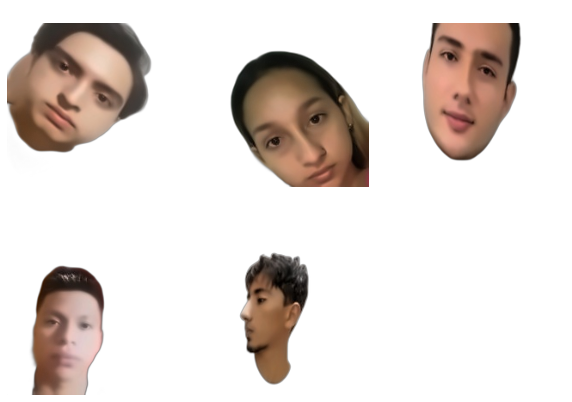

In [116]:
cargarImagenes(ruta_imagenes)